**PREPROCESS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN

from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("C:/Users/srbol/OneDrive/Desktop/Binus/Semester 4/Deep learning/UAS/Nomor 1/GOOGL.csv", parse_dates=['Date'], index_col=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600
...,...,...,...,...,...,...
2020-03-26,1114.719971,1171.479980,1092.030029,1162.920044,1162.920044,3828100
2020-03-27,1127.469971,1151.050049,1104.000000,1110.260010,1110.260010,3139700
2020-03-30,1132.640015,1151.000000,1098.489990,1146.310059,1146.310059,2936800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3932 entries, 2004-08-19 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3932 non-null   float64
 1   High       3932 non-null   float64
 2   Low        3932 non-null   float64
 3   Close      3932 non-null   float64
 4   Adj Close  3932 non-null   float64
 5   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 215.0 KB


Since we're using only closing price and the date column, we can drop the others or make a new dataframe contains only date and closing price

In [5]:
df2 = pd.DataFrame(df['Close'])
df2

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055
...,...
2020-03-26,1162.920044
2020-03-27,1110.260010
2020-03-30,1146.310059


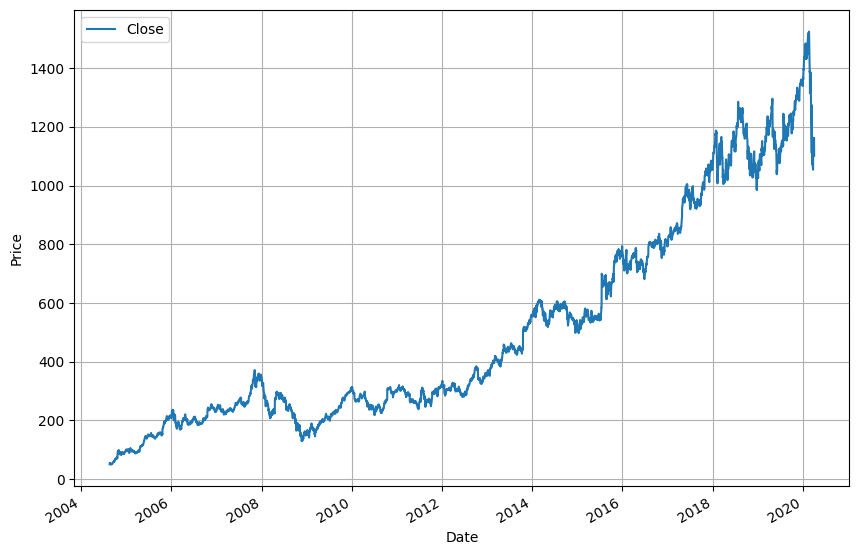

In [6]:
df2.plot(figsize=(10,7))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3932 entries, 2004-08-19 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3932 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


**DATA SPLIT**

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df2 = scaler.fit_transform(df2)

# Convert the result back to a DataFrame
df2 = pd.DataFrame(df2, columns=['Price'])

In [10]:
time_step=df2.index.to_numpy()
price=df2['Price'].values.astype('float32')
time_step[:10],price[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1.1199029e-04, 2.8167302e-03, 3.1866366e-03, 1.6493148e-03,
        2.0327982e-03, 2.6809850e-03, 2.0837015e-03, 6.7873142e-04,
        8.0090243e-04, 8.1448183e-05], dtype=float32))

In [11]:
train_size=int(0.8*len(price))
valid_size=int(0.1*len(price))
test_size=int(0.1*len(price))
print(train_size,valid_size,test_size)

3145 393 393


In [12]:
split_size_train = int(0.8 * len(price))
split_size_val = int(0.1 * len(price))

train_time, train_price = time_step[:split_size_train], price[:split_size_train]
val_time, val_price = time_step[split_size_train:split_size_train + split_size_val], price[split_size_train:split_size_train + split_size_val]
test_time, test_price = time_step[split_size_train + split_size_val:], price[split_size_train + split_size_val:]
len(train_time),len(test_time),len(train_price),len(test_price)

(3145, 394, 3145, 394)

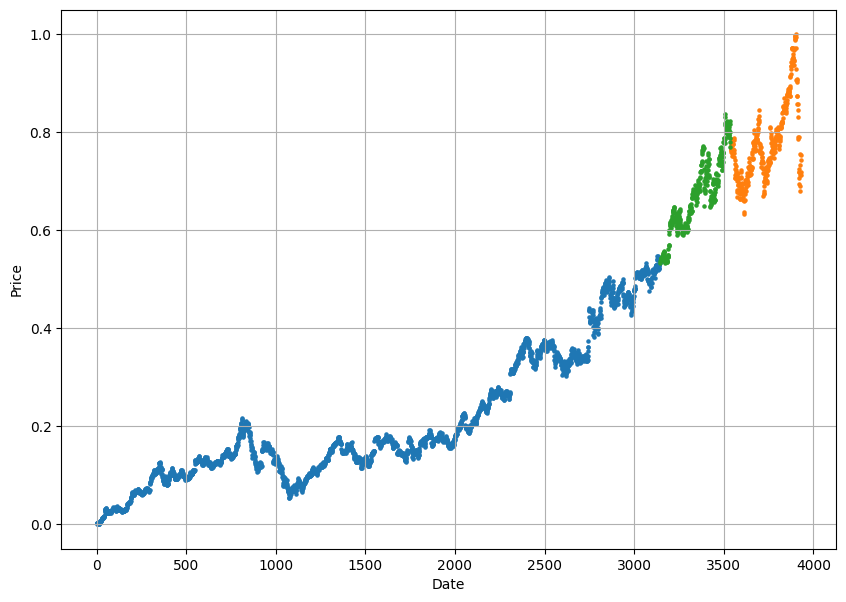

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(train_time, train_price, s=5, label="Train data")
plt.scatter(test_time, test_price, s=5, label="Test data")
plt.scatter(val_time, val_price, s=5, label="val data")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [15]:
import torch
def create_dataset(dataset, step):
    X, y = [], []
    for i in range(len(dataset)-step):
        feature = dataset[i:i+step]
        target = dataset[i+step:i+step+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

c:\Users\srbol\anaconda3\envs\deep_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
step = 5
X_train, y_train = create_dataset(train_price, step=step)
X_val, y_val = create_dataset(val_price, step=step)
X_test, y_test = create_dataset(test_price, step=step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([3140, 5]) torch.Size([3140, 1])
torch.Size([389, 5]) torch.Size([389, 1])


C:\Users\srbol\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  if __name__ == "__main__":


In [17]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(5, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.callbacks import Callback

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=len(X_train)).batch(8)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(8)


class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 20 == 0:
            y_pred_train = self.model.predict(X_train)
            y_pred_val = self.model.predict(X_val)
            y_pred_test = self.model.predict(X_test)

            train_rmse = np.sqrt(MeanSquaredError()(y_train, y_pred_train).numpy())
            val_rmse = np.sqrt(MeanSquaredError()(y_val, y_pred_val).numpy())
            test_rmse = np.sqrt(MeanSquaredError()(y_test, y_pred_test).numpy())

            train_mae = MeanAbsoluteError()(y_train, y_pred_train).numpy()
            val_mae = MeanAbsoluteError()(y_val, y_pred_val).numpy()
            test_mae = MeanAbsoluteError()(y_test, y_pred_test).numpy()

            train_mape = MeanAbsolutePercentageError()(y_train, y_pred_train).numpy()
            val_mape = MeanAbsolutePercentageError()(y_val, y_pred_val).numpy()
            test_mape = MeanAbsolutePercentageError()(y_test, y_pred_test).numpy()

            print(f"Epoch {epoch}: train RMSE {train_rmse:.4f}, val RMSE {val_rmse:.4f}, test RMSE {test_rmse:.4f}")
            print(f"Epoch {epoch}: train MAE {train_mae:.4f}, val MAE {val_mae:.4f}, test MAE {test_mae:.4f}")
            print(f"Epoch {epoch}: train MAPE {train_mape:.4f}, val MAPE {val_mape:.4f}, test MAPE {test_mape:.4f}")

# Melatih model
n_epochs = 100
history = model.fit(train_dataset, validation_data=val_dataset, epochs=n_epochs, callbacks=[MetricsCallback()])




Epoch 1/100
392/393 [============================>.] - ETA: 0s - loss: 0.0027Epoch 0: train RMSE 0.0066, val RMSE 0.0199, test RMSE 0.0240
Epoch 0: train MAE 0.0046, val MAE 0.0164, test MAE 0.0183
Epoch 0: train MAPE 1700.4722, val MAPE 2.4107, test MAPE 2.3679
393/393 [==============================] - 9s 17ms/step - loss: 0.0027 - val_loss: 3.9609e-04
Epoch 2/100
393/393 [==============================] - 6s 15ms/step - loss: 4.7916e-05 - val_loss: 4.3177e-04
Epoch 3/100
393/393 [==============================] - 6s 14ms/step - loss: 5.0015e-05 - val_loss: 4.0584e-04
Epoch 4/100
393/393 [==============================] - 6s 14ms/step - loss: 5.1324e-05 - val_loss: 3.8371e-04
Epoch 5/100
393/393 [==============================] - 5s 14ms/step - loss: 5.0849e-05 - val_loss: 2.5521e-04
Epoch 6/100
393/393 [==============================] - 5s 14ms/step - loss: 4.9313e-05 - val_loss: 2.6921e-04
Epoch 7/100
393/393 [==============================] - 5s 13ms/step - loss: 4.8874e-05 - val_

In [21]:
y_pred_test = model.predict(X_test)

y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()


test_rmse = np.sqrt(MeanSquaredError()(y_test_unscaled, y_pred_test_unscaled).numpy())
test_mae = MeanAbsoluteError()(y_test_unscaled, y_pred_test_unscaled).numpy()
test_mape = MeanAbsolutePercentageError()(y_test_unscaled, y_pred_test_unscaled).numpy()

print(f"Final test RMSE: {test_rmse:.4f}")
print(f"Final test MAE: {test_mae:.4f}")
print(f"Final test MAPE: {test_mape:.4f}")

Final test RMSE: 26.7489
Final test MAE: 17.7823
Final test MAPE: 1.5040


26 RMSE indicates that my model predictions are approximately 26$ away from the actual stock price. So as MAE, 17$ away from the actual price. MAPE with 1,5% means model's predictions have an error of approximately 1.5% relative to the actual stock prices. This metric is useful for understanding the accuracy of predictions in percentage terms.




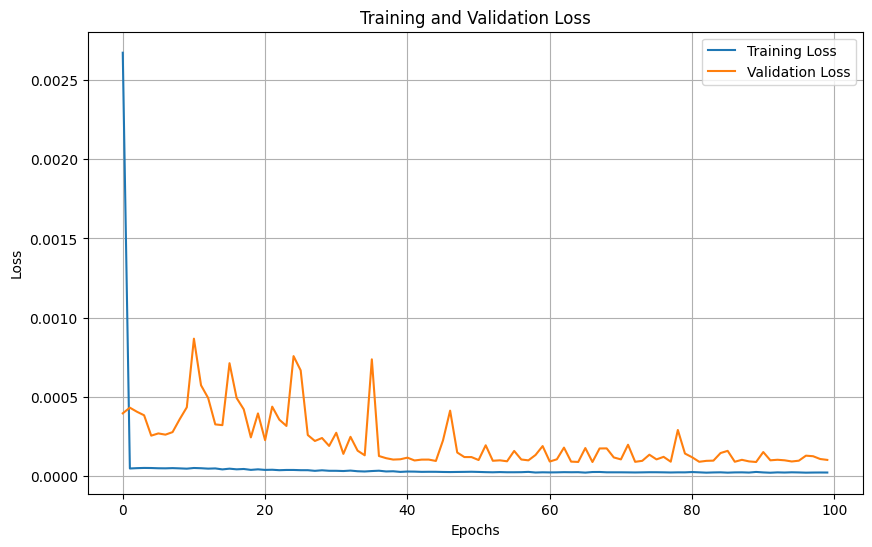

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

The data is overfitting, as seen in the graph where my training loss is very small which indicates that my model performs well on training, but the validation isn't doing really well. 

I'll try to handle this issue in the next model. I can reduce the complexity, do regularization, adjust the training duration etc, optimizer function, etc. But my main intention is to decrease the complexity first, because i think 50 is too many for this one, i'll prefer 30-35.

     Test Pred    Actual
0     0.767427  0.764791
1     0.760150  0.752484
2     0.746252  0.757420
3     0.756777  0.762275
4     0.759938  0.774006
..         ...       ...
384   0.701843  0.754579
385   0.755507  0.718873
386   0.703730  0.743317
387   0.746995  0.753922
388   0.751389  0.713340

[389 rows x 2 columns]


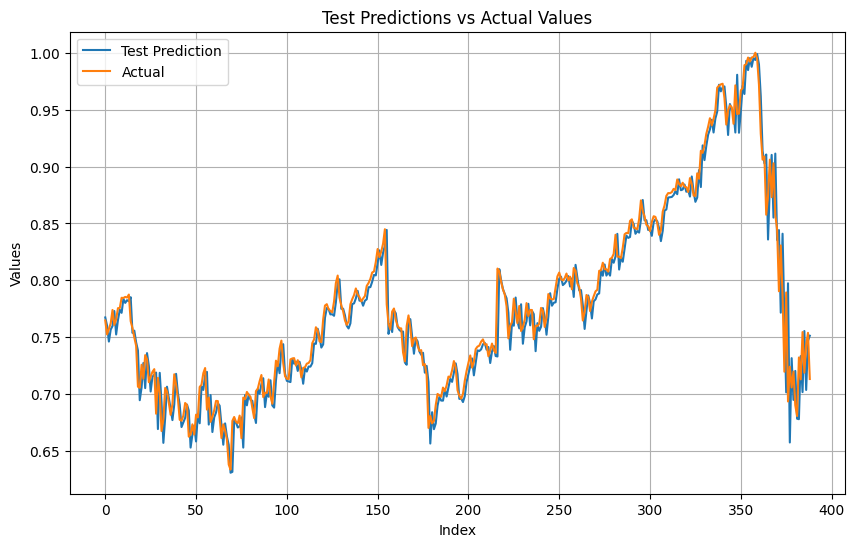

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_test = y_test.flatten()

test_res = pd.DataFrame(data={'Test Pred': y_pred, 'Actual': y_test})

print(test_res)

plt.figure(figsize=(10, 6))
plt.plot(test_res['Test Pred'], label='Test Prediction')
plt.plot(test_res['Actual'], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Test Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


The prediction isn't relly off actualy, but overfitting is our main issue here, as the model can be difficult to predict unseen data.